# Optimal Algorithms

## Table of Contents


**[1. least-squares approximation problem](#id_l)**<br/>
**[2. regularized least-squares approximation problem](#id_rl)**<br/>
**[3. robust regression problem](#id_rr)**<br/>

In [206]:
# 导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

<a id="id_l"></a>
## **1：**Consider the least-squares approximation problem

### **1.1 Gradient Descennt method**

In [326]:
#生成数据
m = 3000
n = 500
np.random.seed(0)
A = np.random.normal(0, 1, (m,n))
x = np.random.normal(0, 1, (n, 1))
b = np.dot(A, x) + np.random.normal(0, 1, (m, 1))

In [327]:
def GradientDescent(x, y, alpha = 0.0001, max_iterations = 40):
    """
    使用固定步长
    
    """
    loss = []
    theta = np.zeros((x.shape[1], 1))      
    for i in range(max_iterations):
        y_hat = np.dot(x, theta)
        gradient = 2 * np.dot(x.T, y_hat - y)
        theta = theta - alpha * gradient
        distence = np.dot(x, theta) - y
        error = np.dot(distence.T, distence)
        loss.append(error[0,0])       
    return loss,theta

result1,x1 = GradientDescent(A, b)

### **1.2 Mini-batch Stochastic Gradient Descent method**

In [328]:
def MiniBatch(x, y, alpha = 0.001,batch = 150, max_epoch = 2):
    """
    使用固定步长
    
    """
    loss = []
    ar = []
    max_iterations = 20
    theta = np.zeros((x.shape[1], 1))      
    for i in range(max_epoch):
        for j in range(max_iterations):
            a = j * batch + 1
            ar.append(a)
            b = (j + 1) * batch
            x_min = x[a:b, ]
            y_min = y[a:b]
            y_hat = np.dot(x_min, theta)
            gradient = 2 * np.dot(x_min.T, y_hat - y_min)
            theta = theta - alpha * gradient
            y_hat = np.dot(x_min, theta)
            distence = y_hat - y_min
            error = np.dot(distence.T, distence)
            loss.append(error[0,0])       
    return loss,theta

result2,x2 = MiniBatch(A, b)

### **1.3 对比**

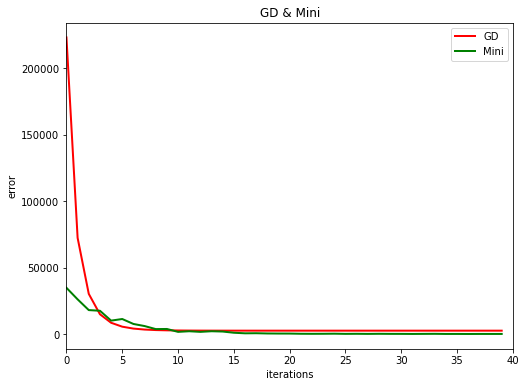

In [329]:
plt.figure(figsize=(8, 6))
plt.plot( result1, c='red', label='GD',linewidth = 2)
plt.plot( result2, c='green', label='Mini',linewidth = 2)
plt.xlim(0,40)
plt.legend(loc='best')
plt.xlabel("iterations")
plt.ylabel("error")
plt.title("GD & Mini")
plt.show()

**结果分析：**从迭代次数来看，Gradient Descennt method 比 Mini-batch Stochastic Gradient Descent method 下降得更快，但查找资料了解到在相同浮点数计算下，Mini-batch会下降得更快。GD能够保证一致下降，而Mini-batch不保证下降所以图像有抖动。从精度上来看，10步以后两者精度差不多。

可以打印最后一次迭代两种方法求得的最优值，第一列表示实际真值，第二列是GD求得的最优值，第三列是Mini-Batch求得的最优值：

In [330]:
for i in range(10):
    print("参数的第{}个分量".format(i),x[i], x1[i], x2[i])

参数的第0个分量 [-0.39087803] [-0.37628237] [-0.35430092]
参数的第1个分量 [0.92911117] [0.9497118] [0.90602694]
参数的第2个分量 [-1.44006344] [-1.45591406] [-1.42475361]
参数的第3个分量 [-0.11174903] [-0.10285445] [-0.0741932]
参数的第4个分量 [-1.9845659] [-2.01561596] [-2.01750034]
参数的第5个分量 [-0.01883157] [0.0196292] [0.05785864]
参数的第6个分量 [0.31478548] [0.35555164] [0.31855638]
参数的第7个分量 [0.01362191] [0.03315403] [0.03388235]
参数的第8个分量 [1.24399245] [1.2572225] [1.29287054]
参数的第9个分量 [0.16882666] [0.17013824] [0.15443049]


<a id="id_rl"></a>
## **2：**Consider the regularized  least-squares approximation problem

### **2.1 Iterative Soft-Thresholding Algorithm**

In [355]:
#生成数据
m = 3000
n = 500
np.random.seed(0)
A = np.random.normal(0, 1, (m,n))
x = np.random.normal(0, 1, (n, 1))
b = np.dot(A, x) + np.random.normal(0, 1, (m, 1))

In [356]:
#软阈值函数
def soft_thresholding(beta, lambda0):
    for i in range(len(beta)):
        if beta[i] > lambda0:
            beta[i] = beta[i] - lambda0
        elif beta[i] < - lambda0:
            beta[i] = beta[i] + lambda0
        else:
            beta[i] = 0
    return beta

def ISTA(x, y, alpha = 1e-5, max_iterations = 500):
    """
    使用固定步长
    
    """
    lambda0 = 0.05 * m
    loss = []
    theta = np.zeros((x.shape[1], 1))
    soft = lambda0 * alpha
    for i in range(max_iterations):
        y_hat = np.dot(x, theta)
        distence = y_hat - y
        error = 0.5 * np.dot(distence.T, distence) + lambda0 * sum(abs(theta))
        loss.append(error[0,0])       
        variation = alpha * np.dot(x.T, y - y_hat)
        theta = soft_thresholding(theta + variation, soft)
    return loss, theta

result3, x3 = ISTA(A, b)

### **2.2 Alternating Direction Method of Multipliers**

In [357]:
#软阈值函数
def soft_thresholding(beta, lambda0):
    for i in range(len(beta)):
        if beta[i] > lambda0:
            beta[i] = beta[i] - lambda0
        elif beta[i] < - lambda0:
            beta[i] = beta[i] + lambda0
        else:
            beta[i] = 0 
    return beta


def ADMM(A, b, rho=0.75, lambda0 = m * 0.05, max_iterations = 150):
    """
    使用固定步长
    
    """
    loss = []
    x = np.zeros((A.shape[1], 1))
    y = np.zeros((A.shape[1], 1))
    z = np.zeros((A.shape[1], 1))
    I = np.eye((A.shape[1]))
    
    for i in range(max_iterations):       
        b_hat = np.dot(A, x)
        distence = b_hat - b
        error = 0.5 * np.dot(distence.T, distence) + lambda0 * sum(abs(z))
        loss.append(error[0,0])
        x_new = np.dot(np.linalg.inv((np.dot(A.T, A) + rho * I)), (np.dot(A.T, b) + rho * z - y))
        z_new = soft_thresholding(x_new + y / rho,lambda0 / rho)
        y_new = y + rho * (x_new - z_new)
        x=x_new
        y=y_new
        z=z_new   
    return loss,x

result4,x4 = ADMM(A, b)

### **2.3 对比**

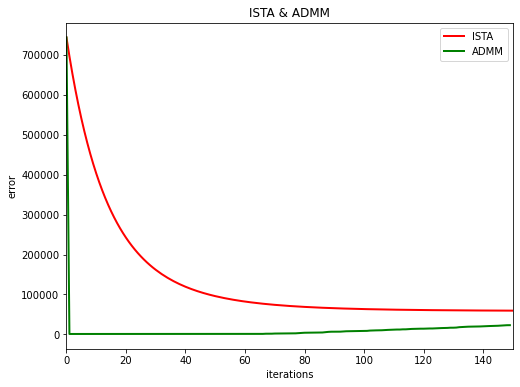

In [358]:
plt.figure(figsize=(8, 6))
plt.plot( result3, c='red', label='ISTA',linewidth = 2)
plt.plot( result4, c='green', label='ADMM',linewidth = 2)
plt.xlim(0,150)
plt.legend(loc='best')
plt.xlabel("iterations")
plt.ylabel("error")
plt.title("ISTA & ADMM")
plt.show()

**结果分析：**从迭代次数来看，ADMM 比 ISTA 下降得更快,从精度上来看，相同迭代次数下ADMM的误差更小。

<a id="id_rr"></a>
## **3：**Consider the robust regression problem

### **3.1 Sub-gradient Descent method**

In [359]:
#生成数据
m = 3000
n = 500
np.random.seed(0)
A = np.random.normal(0, 1, (m,n))
x = np.random.normal(0, 1, (n, 1))
b = np.dot(A, x) + np.random.normal(0, 1, (m, 1))

In [360]:
#次梯度
def subgradient(x):
    for i in range(len(x)):
        x[i] = np.sign(x[i])
    return x

def SubGradientDescent(x, y, alpha = 0.001, max_iterations = 2000):
    """
    使用固定步长
    
    """
    loss = []
    theta = np.zeros((x.shape[1], 1))
    for i in range(max_iterations):       
        y_hat = np.dot(x, theta)
        distence = y_hat - y
        error = sum(abs(distence))
        loss.append(error[0])
        
        gradient = np.dot(x.T, subgradient(distence))
        new_theta = theta - alpha * gradient
        theta = new_theta
    return loss,theta

result5, x5 = SubGradientDescent(A, b)

### **3.2 Alternating Direction Method of Multipliers**

In [361]:
#软阈值函数
def soft_thresholding(beta, lambda0):
    for i in range(len(beta)):
        if beta[i] > lambda0:
            beta[i] = beta[i] - lambda0
        elif beta[i] < - lambda0:
            beta[i] = beta[i] + lambda0
        else:
            beta[i] = 0
    return beta


def ADMM(A, b, rho = 1e-6, max_iterations = 100):
    """
    使用固定步长
    
    """
    loss = []
    x = np.zeros((A.shape[1], 1))
    y = np.zeros((A.shape[0], 1))
    z = np.zeros((A.shape[0], 1))    
    for i in range(max_iterations):       
        b_hat = np.dot(A, x)
        distence = b_hat - b
        error = sum(abs(distence))
        loss.append(error[0])
        
        x_new = np.dot(np.dot(np.linalg.inv(rho * np.dot(A.T, A)), A.T), rho * z + rho * b - y)
        z_new = soft_thresholding(np.dot(A, x_new) - b + y / rho, 1 / rho)
        y_new = y + rho * (np.dot(A, x_new) - z_new - b)
        x=x_new
        y=y_new
        z=z_new   
    return loss,x
result6, x6 = ADMM(A, b)

### **3.3 对比**

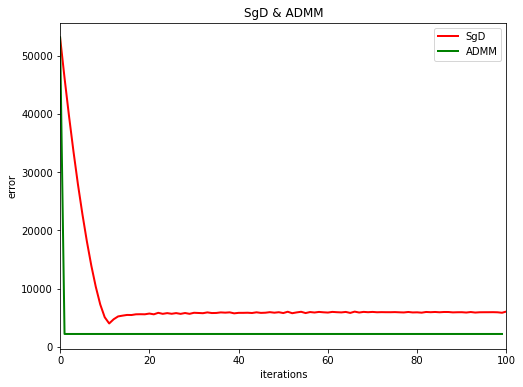

In [363]:
plt.figure(figsize=(8, 6))
plt.plot( result5, c='red', label='SgD',linewidth = 2)
plt.plot( result6, c='green', label='ADMM',linewidth = 2)
plt.xlim(0,100)
plt.legend(loc='best')
plt.xlabel("iterations")
plt.ylabel("error")
plt.title("SgD & ADMM")
plt.show()

**结果分析：**从迭代次数来看，ADMM 比 SgD 下降得更快,从精度上来看，相同迭代次数下ADMM的误差更小。